## Conditional Probability Practice Questions:

**1a) Probability test result is positive:**

In [1]:
print("P(T) =", 0.95*0.005+ 0.1*0.995)

P(T) = 0.10425000000000001


**1b) Given positive result, probability person is a sufferer:**

In [5]:
print("P(S|T) =", 0.95*0.005/0.1042)

P(S|T) = 0.04558541266794625


**1c) given negative result, person non-sufferer:**

In [6]:
print("P(S'|T')", 0.9*0.995/(1-0.1042))

P(S'|T') 0.9996651038178164


**1d) person will be misclassified:**

In [9]:
print("P(T|S')=", 0.1*0.995 + 0.05*0.005)

P(T|S')= 0.09975


**2) Monty Hall Games Problem:**

**3. Predict Gender for Mail:**
<br>
Calculate P(Male|name length) and P(Female|name length) in order to predict class

Laurence:
- seven or more letters
- two syllables
- ends in vowel

In [23]:
print("P(M|L) = ", 0.5*125/476*307/476*86/476)

P(M|L) =  0.015300160474471549


In [18]:
print("P(M|L) = ", 0.3627*0.5/0.4303)

P(M|L) =  0.4214501510574018


In [22]:
print("P(F|L) = ", 0.3627*0.5/0.4979)

P(F|L) =  0.3642297650130549


**Exercise 5:**
<br>
Predict class for input -.33 .69 0 1 1 0 .8 0 .88 for model trained with dataset

In [34]:
import pandas as pd
data = pd.read_csv('Data/fertility_Diagnosis.txt')

In [35]:
data

,-0.33,0.69,0,1,1.1,0.1,0.8,0.2,0.88,N
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
...,...,...,...,...,...,...,...,...,...,...
94,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
95,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
96,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
97,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


What different X do we use? We have the following options:
* Gaussian NB: used for features in decimal form
* Multinomial NB
* Bernoulli NB

In [38]:
X = data.iloc[:, :9]
y = data.iloc[:, 9]

In [45]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#y_pred = clf.predict(X_test)
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
X.shape

(99, 9)

In [51]:
print(clf.predict([[-.33, 0.69, 0, 1, 1, 0, 0.8, 0, 0.88]]))

['N']


**About the multinomial Bayes' Classifier:**

The Guassian assumption is not the only assumption that could be used about the generative distribution for each label; another useful example is *multinomial naive bayes*, where features are assumed to be generated from a multinomial distribution.  The multinomial distribution describes the probability of observing counts among a number of categories and **thus multinomia naives bayes is most appripriate for features that represent counts or count rates.**

One example where a multinomial naive bayes might be useful is in **text classification**, where the features are related to word counts of frequencies within the documents to be arranged.

Before doing any classification we should *vectorize* our documents.

In [52]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [53]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [54]:
#For simplicity, let's just select a few categories

categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset = 'train', categories = categories, remove = ['headers', 'footers', 'quotes'])
test = fetch_20newsgroups(subset= 'test', categories = categories, remove = ['headers', 'footers', 'quotes'])

In [56]:
print(train.data[5])

Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number


In order to use this data for ML, we need to convert the content of each string into a vector of numbers.
We will use TF-IDF vectorizer, which weights the word frequency by a measure of how often they appear in documents. We can create a pipeline now:

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [62]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [64]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
mat

array([[318,  11,  60,   0],
       [ 13, 273, 108,   0],
       [  4,   2, 392,   0],
       [  4,   5, 240,   2]])

Text(55.440000000000005, 0.5, 'predicted label')

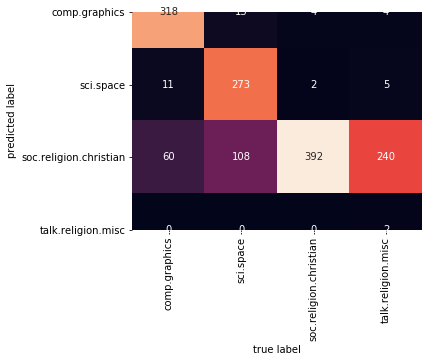

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels = train.target_names,
           yticklabels = train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [73]:
def predict_category(s, train=train, model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [97]:
predict_category('God')

'soc.religion.christian'

In [109]:
predict_category('space')

'sci.space'

In [111]:
predict_category('space God')

'sci.space'

- Here we can see that when we put in God the outcome is soc.religion.christian
- When we put in space it is sci.space
- However, when we put in both it is sci.space --> how do we explain this? Each vector will have an associated probability for each categories. The combined probabilities of God (high for religion, low for space) and space (high for space, low for religion) will overall be highest for space. 
- We can express this as: probability God = soc.religion.christian + probability space = soc.religion.christian < probability God = sci.space + probability space = sci.space
- Underlying this we can see that in these 50-50 cases comes down to the vectorization of each individual token which comes down to the train data.
- Why is this useful? This can be useful in seeing in granular detail the reasons *why* we have certain outcomes or not. We can do conditions that see these cases of misclassification use different vectorization techniques for example.

In [118]:
model.predict_proba(['God space'])

array([[0.06842633, 0.46591771, 0.36019814, 0.10545781]])

In [117]:
model.predict_proba(['space'])

array([[0.07853488, 0.85416996, 0.04379453, 0.02350063]])

In [119]:
model.predict_proba(['God'])

array([[0.02850762, 0.03329118, 0.76154141, 0.17665979]])

So here we can see that the probability that God is socio.christian is **lower** (at .76) than space is space (.85) with God belonging to space and space belong to socio.christian roughly the same.

**However, what if we use fewer categories?**

In [120]:
#For simplicity, let's just select a few categories

categories = ['soc.religion.christian', 'sci.space']
train = fetch_20newsgroups(subset = 'train', categories = categories, remove = ['headers', 'footers', 'quotes'])
test = fetch_20newsgroups(subset= 'test', categories = categories, remove = ['headers', 'footers', 'quotes'])

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [122]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [123]:
predict_category('space God')

'sci.space'

In [124]:
model.predict_proba(['God space'])

array([[0.53007378, 0.46992622]])

But even with few categories we see space is stronger.